In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def rgb_to_hsv(r, g, b):
    ma, mi = max(r, g, b), min(r, g, b)
    h, s, v = 0, ma - mi, ma
    if mi == b:
        h = 60 * (g-r) / (ma-mi) + 60
    elif mi == r:
        h = 60 * (b-g) / (ma-mi) + 180
    elif mi == g:
        h = 60 * (r-b) / (ma-mi) + 300
    return (h, s, v)

In [3]:
def hsv_to_rgb(h, s, v):
    c, h_p = s, h/60
    x = c * (1 - abs(h_p % 2 - 1))
    vec = [[c, x, 0], [x, c, 0], [0, c, x], [0, x, c], [x, 0, c], [c, 0, x]]

    r, g, b = v-c, v-c, v-c
    if 0 <= h_p < 6:
        h_p = int(h_p)
        r += vec[h_p][0]
        g += vec[h_p][1]
        b += vec[h_p][2]
    return (r, g, b)

In [4]:
img = cv2.imread("../imori.jpg")
img = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) / 255
H, W, ch = img.shape
print("# image size:", H, W, ch)

for i in range(H):
    for j in range(W):
        r, g, b = img[i][j][:]
        
        h, s, v = rgb_to_hsv(r, g, b)
        h = (h + 180) % 360
        
        r, g, b = hsv_to_rgb(h, s, v)
        r = int(r * 255)
        g = int(g * 255)
        b = int(b * 255)

        img[i, j, 0] = r
        img[i, j, 1] = g
        img[i, j, 2] = b
        
img = img.astype(int)

# image size: 128 128 3


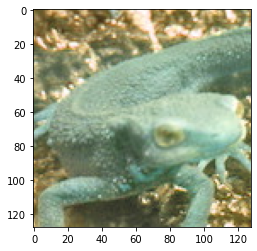

In [5]:
plt.imshow(img)
plt.show()